In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/raghav/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [61]:
df = pd.read_csv('data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [62]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                    125
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [63]:
#The above implies that City_Category , Product_Category_1 and Product_Category_2 have null values. we should fill them
df = df.fillna(0)

In [64]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [65]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [66]:
# We will focus on the object data type as it cannot be directly fed into the Machine learning model
df.Gender.unique()
def map_gender(gender):
    if gender == 'F':
        return 1
    else:
        return 0
df['Gender'] = df['Gender'].apply(map_gender)

In [67]:
df.Gender.unique()

array([1, 0])

In [68]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [69]:
def map_age(age):
    if age == '0-17':
        return 1
    elif age == '18-25':
        return 2
    elif age == '26-35':
        return 3
    elif age == '36-45':
        return 4
    elif age == '46-50':
        return 5
    elif age == '51-55':
        return 6
    else:
        return 7
df['Age'] = df['Age'].map(map_age)

In [70]:
df.Age.unique()

array([1, 7, 3, 5, 6, 4, 2])

In [71]:
cols = ['User_ID','Product_ID']
df.drop(cols,inplace=True,axis=1)

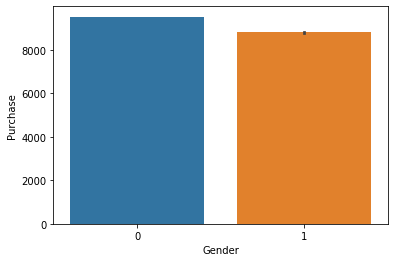

In [72]:
# We have a barplot
sns.barplot('Gender','Purchase',data=df)
plt.show()

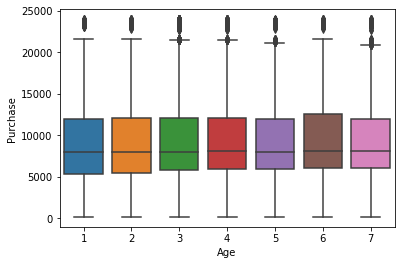

In [73]:
# We have a boxplot
sns.boxplot('Age','Purchase',data=df)
plt.show()

In [74]:
df[['Gender','Purchase']].groupby('Gender').mean() #Group by is an important command

,Purchase
Gender,
0,9504.771713
1,8809.761349


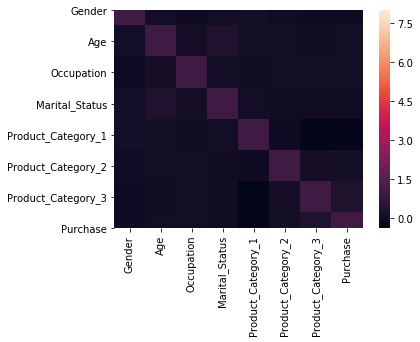

In [54]:
cormat = df.corr()
sns.heatmap(cormat,vmax=8,square=True)

In [75]:
df["City_Category"].unique()

array(['A', 0, 'C', 'B'], dtype=object)

In [76]:
df["City_Category"] = df["City_Category"].map({
    "A":"Small",
    "B":"Okay",
    "C":"Large",
    0:"Okay"
})

In [77]:
df["City_Category"].unique()

array(['Small', 'Okay', 'Large'], dtype=object)

In [79]:
# We use to rename the columns
df.rename(columns={"Product_Category_1":"wine","Product_Category_2":"vodka","Product_Category_3":"Rum"},inplace=True)

In [81]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
wine                            int64
vodka                         float64
Rum                           float64
Purchase                        int64
dtype: object

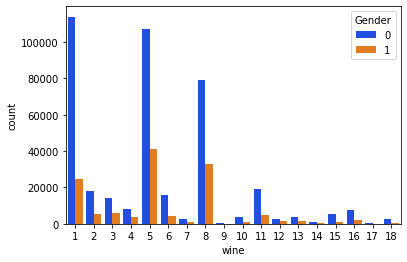

In [85]:

sns.countplot(x="wine",hue="Gender",palette="bright",data=df)
plt.show()

In [88]:
# Learn one thing.
'''
    1. To read an excel file, we have the direct command as pd.read_excel()
    2. We have two function loc and iloc
'''
df1 = pd.read_csv('employee.csv')
df1.head()

,Name,Department,Manager,Salary
0,Robin Hood,NaN,NaN,200
1,Arsene Wenger,Bar,Friar Tuck,50
2,Friar Tuck,Foo,Robin Hood,100
3,Little John,Foo,Robin Hood,100
4,Sam Allardyce,NaN,NaN,250


In [90]:
print(df1[0:2]['Name'])

0       Robin Hood
1    Arsene Wenger
Name: Name, dtype: object


In [92]:
print(df1[0:2])

            Name Department     Manager  Salary
0     Robin Hood        NaN         NaN     200
1  Arsene Wenger        Bar  Friar Tuck      50


In [95]:
print(df1[:]['Name'])

0       Robin Hood
1    Arsene Wenger
2       Friar Tuck
3      Little John
4    Sam Allardyce
5    Dimi Berbatov
Name: Name, dtype: object


In [102]:
print(df1.loc[1:2,['Name','Department']])

            Name Department
1  Arsene Wenger        Bar
2     Friar Tuck        Foo


250
50
125.0
82.15838362577492


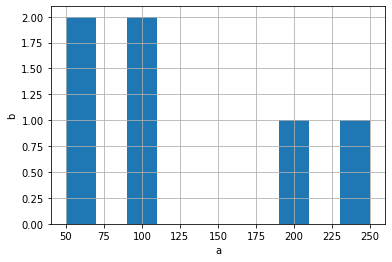

In [123]:
#This is to get the Maximum and the minimumvalues.
print(df1.Salary.max())
print(df1.Salary.min())
print(df1.Salary.mean())
print(df1.Salary.std())

ax = df1.Salary.hist()
ax.set(xlabel="a",ylabel="b")  #This is just to set what to see on the x and y label.
plt.show()